In [3]:
from sequence import * 
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import seaborn as sns
from sklearn.preprocessing import StandardScaler

from scipy import sparse, stats



import sklearn.datasets

### Read in data from class I and class II KARIs 

In [5]:

class_1_c1 = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classI_kari/kari_class_1_swissprot_c1_domains.fasta')

#print(len(class_1_c1))

class_2_c1_seqs = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/kari_class_2_swissprot_c1_domains.fasta')

#print(len(class_2_c1_seqs))

class_2_c2_seqs = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/kari_class_2_swissprot_c2_domains.fasta')

#print(len(class_2_c2_seqs))




#whole sequences 
class_1 = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classI_kari/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot_classI_kari.fasta')

class_2 = readFastaFile('../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classII_kari/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot_classII_kari.fasta')

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/kari_ec_1_1_1_86_ec_1_1_1_382_ec_1_1_1_383_swissprot/subsets/classI_kari/kari_class_1_swissprot_c1_domains.fasta'

### Define functions for Kmer counting 

In [3]:
#simple sliding window kmer counter 

def count_kmers(seq, k_len):
    
    kmers = defaultdict(int)
    
    for i in range(len(seq) - k_len + 1):
        kmers[seq[i:i+k_len]] += 1 

    return kmers


#create a dictionary mapping kmer counts to a particular sequence 
def construct_ids(sequences: list, k) -> dict:  
    
    ids = {}
    for seq in sequences:
        ks = count_kmers(seq, k)
        
        ids[seq.name] = ks
        
    return ids

### Save all kmer counts into dictionaries 

In [4]:

class1_c1_ids = construct_ids(class_1_c1, 3)
class2_c1_ids = construct_ids(class_2_c1_seqs, 3)
class2_c2_ids = construct_ids(class_2_c2_seqs, 3)


In [5]:
##whole sequence 

class_1_ids = construct_ids(class_1, 3)
class_2_ids = construct_ids(class_2, 3)


### Construct dataframes 

In [6]:
class_1_c1 = pd.DataFrame.from_dict(class1_c1_ids, orient='index')

class_2_c1 = pd.DataFrame.from_dict(class2_c1_ids, orient='index')

class_2_c2 = pd.DataFrame.from_dict(class2_c2_ids, orient='index')


In [7]:
#whole sequence 
class_1_df = pd.DataFrame.from_dict(class_1_ids, orient='index')

class_2_df = pd.DataFrame.from_dict(class_2_ids, orient='index')


### Visualise sparcity of data 

#### C Domains

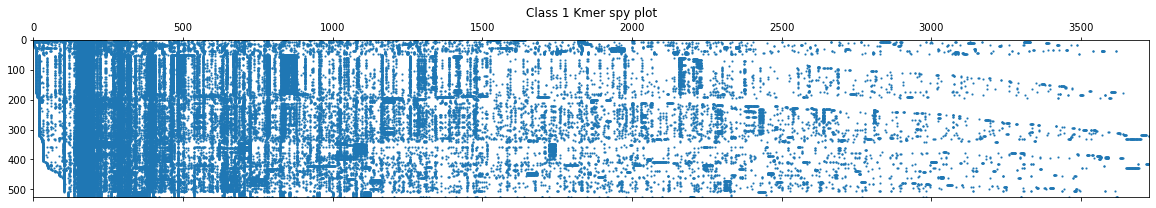

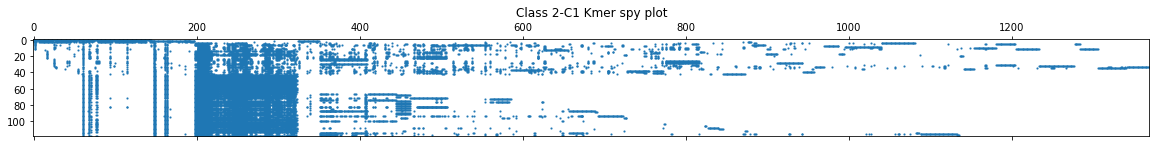

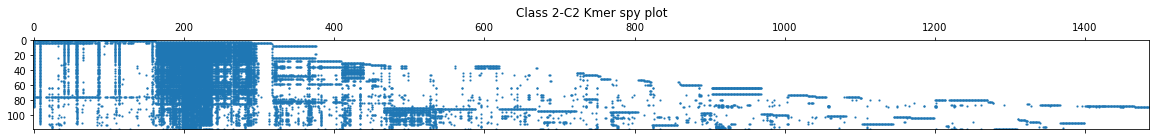

In [8]:
#blue dot = kmer count present 
fig= plt.figure(figsize=(20,20))
plt.title("Class 1 Kmer spy plot")
plt.spy(class_1_c1, markersize=1)

fig2= plt.figure(figsize=(20,20))
plt.title("Class 2-C1 Kmer spy plot")
plt.spy(class_2_c1, markersize=1)

fig3= plt.figure(figsize=(20,20))
plt.title("Class 2-C2 Kmer spy plot")
plt.spy(class_2_c2, markersize=1)

### Whole sequence 

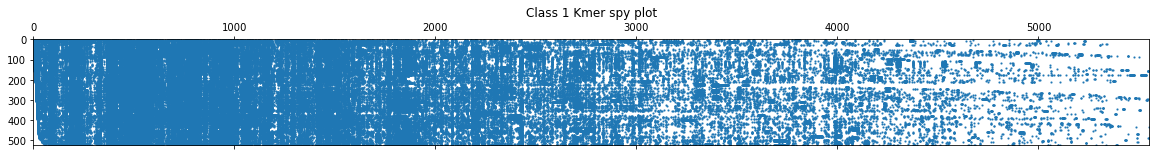

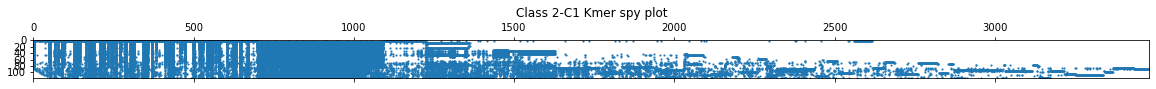

In [9]:
#whole sequence 

#blue dot = kmer count present 
fig= plt.figure(figsize=(20,20))
plt.title("Class 1 Kmer spy plot")
plt.spy(class_1_df, markersize=1)

fig2= plt.figure(figsize=(20,20))
plt.title("Class 2-C1 Kmer spy plot")
plt.spy(class_2_df, markersize=1)



### Perform normalisation 

Will initally try normalising by Euclidean distance for each sequence so total counts all add to 1. 

Euc_dist = sqrt(x^2 + y^2...) 

#### Whole sequence Class 1 & 2 

In [10]:
annot_name = [x+"_class_1" for x in class_1_df.index]

test = class_1_df.sum(axis=1)
class_1_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class_1_df, test), index=annot_name, columns=class_1_df.columns)
class_1_norm.fillna(0, inplace=True)

scaler_class_1 = StandardScaler()
scaled_class_1_data  = pd.DataFrame(scaler_class_1.fit_transform(class_1_norm), index=annot_name, columns=class_1_df.columns)

scaled_class_1_data

,MLR,LRT,RTQ,TQA,QAA,AAR,ARL,RLI,LIC,ICN,...,HSF,QQH,AFP,VPL,WAA,AQC,IFS,SHD,KRY,FYN
P06168_class_1,6.499131,4.849082,15.186102,7.470568,1.889504,3.892536,2.726883,2.934344,7.966303,22.934690,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
E0SRA9_class_1,7.693865,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
A4YI15_class_1,7.693865,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,3.513971,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
Q9RU74_class_1,7.670436,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
A5FR44_class_1,7.765006,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A6SZZ1_class_1,-0.131647,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
A1VN04_class_1,-0.131647,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
C0QMX0_class_1,-0.131647,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602
Q4FPQ6_class_1,-0.131647,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,-0.043602,-0.043602,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602,-0.043602,-0.043602


In [11]:
test2 = class_2_df.sum(axis=1)
annot_name = [x+"_class_2" for x in class_2_df.index]


class2_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class_2_df, test2), index=annot_name, columns=class_2_df.columns) 
class2_norm.fillna(0, inplace=True)

scaler_class_2 = StandardScaler()
scaled_class_2_data  = pd.DataFrame(scaler_class_2.fit_transform(class2_norm), index=annot_name, columns=class_2_df.columns)

scaled_class_2_data

,MAA,AAA,AAT,ATS,TSS,SSI,SIA,IAP,APS,PSL,...,LCP,DLQ,INH,ENH,RKY,KYM,YMV,VDM,KPI,IKL
Q05758_class_2,5.315981,0.178985,0.278162,5.428638,5.747129,6.879721,3.440239,6.896774,5.808907,5.738022,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65XK0_class_2,5.440169,6.159898,-1.505132,-0.160220,-0.160178,-0.130151,-0.225861,-0.130176,-0.160154,5.871141,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q01292_class_2,5.278865,0.169176,2.037397,-0.160220,-0.160178,-0.130151,3.415510,-0.130176,5.768644,-0.160194,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
O82043_class_2,5.411015,0.204101,-1.505132,-0.160220,5.849155,-0.130151,-0.225861,-0.130176,-0.160154,-0.160194,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
P05793_class_2,-0.186487,0.476368,0.642843,-0.160220,-0.160178,-0.130151,-0.225861,-0.130176,-0.160154,-0.160194,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3N3E9_class_2,-0.186487,-1.275218,-1.505132,-0.160220,-0.160178,-0.130151,-0.225861,-0.130176,-0.160154,-0.160194,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
B0BTD3_class_2,-0.186487,-1.275218,-1.505132,-0.160220,-0.160178,-0.130151,-0.225861,-0.130176,-0.160154,-0.160194,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
B8F6G2_class_2,-0.186487,-1.275218,-1.505132,-0.160220,-0.160178,-0.130151,-0.225861,-0.130176,-0.160154,-0.160194,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65WK8_class_2,-0.186487,-1.275218,-1.505132,-0.160220,-0.160178,-0.130151,-0.225861,-0.130176,-0.160154,-0.160194,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


### C domains 

In [12]:
class_1_c1 = pd.DataFrame.from_dict(class1_c1_ids, orient='index')

class_2_c1 = pd.DataFrame.from_dict(class2_c1_ids, orient='index')

class_2_c2 = pd.DataFrame.from_dict(class2_c2_ids, orient='index')


#### Class 2 - C1

In [27]:
class_1_c1

,TFE,FER,ERE,REV,EVN,VNS,NSD,SDL,DLY,LYG,...,TVH,AVP,VPL,SPV,NRK,RWA,WAA,HLM,MVA,KRY
P06168_class_1_c1_domain,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P38674_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q64BR7_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q57179_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q8FPX1_class_1_c1_domain,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2ILY8_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q02YY8_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4W3V8_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4VXL3_class_1_c1_domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test3 = class_1_c1.sum(axis=1)
annot_name = [x+"_class_2" for x in class_1_c1.index]


class_1_c1_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class_1_c1, test3), index=annot_name, columns=class_1_c1.columns) 
class_1_c1_norm.fillna(0, inplace=True)

scaler_class_1_c1 = StandardScaler()
scaled_class_1_c1_data  = pd.DataFrame(scaler_class_1.fit_transform(class_1_c1_norm), index=annot_name, columns=class_1_c1.columns)

scaled_class_1_c1_data

,TFE,FER,ERE,REV,EVN,VNS,NSD,SDL,DLY,LYG,...,TVH,AVP,VPL,SPV,NRK,RWA,WAA,HLM,MVA,KRY
P06168_class_1_c1_domain_class_2,6.778941,13.093931,8.516053,12.967398,16.089305,13.154618,9.210472,5.973551,11.725622,13.154618,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
P38674_class_1_c1_domain_class_2,6.778941,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,5.973551,5.788804,13.154618,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q64BR7_class_1_c1_domain_class_2,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q57179_class_1_c1_domain_class_2,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q8FPX1_class_1_c1_domain_class_2,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2ILY8_class_1_c1_domain_class_2,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
Q02YY8_class_1_c1_domain_class_2,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
A4W3V8_class_1_c1_domain_class_2,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602
A4VXL3_class_1_c1_domain_class_2,-0.146003,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.061721,-0.043602,-0.043602,-0.043602


#### Class 2 - C1

In [14]:
test4 = class_2_c1.sum(axis=1)
annot_name = [x+"_class_2" for x in class_2_c1.index]


class_2_c1_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class_2_c1, test4), index=annot_name, columns=class_2_c1.columns) 
class_2_c1_norm.fillna(0, inplace=True)

scaler_class_2_c1 = StandardScaler()
scaled_class_2_c1_data  = pd.DataFrame(scaler_class_2.fit_transform(class_2_c1_norm), index=annot_name, columns=class_2_c1.columns)

scaled_class_2_c1_data

,TLE,LEQ,EQE,QEY,EYR,YRS,RSD,SDI,DIF,IFG,...,IDD,DDW,WNS,NSD,SDD,RTQ,TQI,KTD,KCK,CKI
Q05758_class_2_c1_domain_class_2,5.361903,4.243768,2.925011,5.361903,10.862780,10.862780,10.862780,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65XK0_class_2_c1_domain_class_2,5.361903,4.243768,2.925011,5.361903,-0.092057,-0.092057,-0.092057,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q01292_class_2_c1_domain_class_2,5.361903,4.243768,2.925011,5.361903,-0.092057,-0.092057,-0.092057,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
O82043_class_2_c1_domain_class_2,5.361903,4.243768,2.925011,5.361903,-0.092057,-0.092057,-0.092057,5.361903,5.361903,5.361903,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q491Z2_class_2_c1_domain_class_2,-0.186501,4.677817,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q0I511_class_2_c1_domain_class_2,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65WK8_class_2_c1_domain_class_2,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q7VRM0_class_2_c1_domain_class_2,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9CLF1_class_2_c1_domain_class_2,-0.186501,-0.230281,-0.334856,-0.186501,-0.092057,-0.092057,-0.092057,-0.186501,-0.186501,-0.186501,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


In [15]:
test5 = class_2_c2.sum(axis=1)
annot_name = [x+"_class_2" for x in class_2_c2.index]


class_2_c2_norm = pd.DataFrame(np.apply_along_axis(np.divide, 0, class_2_c2, test5), index=annot_name, columns=class_2_c2.columns) 
class_2_c2_norm.fillna(0, inplace=True)

scaler_class_2_c2 = StandardScaler()
scaled_class_2_c2_data  = pd.DataFrame(scaler_class_2.fit_transform(class_2_c2_norm), index=annot_name, columns=class_2_c2.columns)

scaled_class_2_c2_data

,DLG,LGP,GPL,PLY,LYP,YPF,PFT,FTA,TAG,AGV,...,LQF,QFD,INH,NHD,IEN,ENH,RKY,KYM,YMV,VDM
Q05758_class_2_c2_domain_class_2,0.621365,5.361903,5.361903,6.218253,6.218253,6.218253,5.361903,5.361903,5.361903,0.437123,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65XK0_class_2_c2_domain_class_2,0.621365,5.361903,5.361903,-0.160817,-0.160817,-0.160817,5.361903,5.361903,5.361903,0.437123,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
P05793_class_2_c2_domain_class_2,0.569568,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,0.368156,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
P05989_class_2_c2_domain_class_2,0.569568,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,0.368156,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q01292_class_2_c2_domain_class_2,0.621365,5.361903,5.361903,6.218253,6.218253,6.218253,5.361903,5.361903,5.361903,0.437123,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9AQ99_class_2_c2_domain_class_2,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQA0_class_2_c2_domain_class_2,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ96_class_2_c2_domain_class_2,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ97_class_2_c2_domain_class_2,-1.761311,-0.186501,-0.186501,-0.160817,-0.160817,-0.160817,-0.186501,-0.186501,-0.186501,-2.735360,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


### Integrating datasets

#### Whole sequences

In [16]:
combined_data_whole_seqs = pd.concat([scaled_class_1_data, scaled_class_2_data], join="outer")
#,scaled_class_2_c2_data

combined_data_whole_seqs.fillna(0, inplace=True)


In [17]:
combined_data_whole_seqs

,MLR,LRT,RTQ,TQA,QAA,AAR,ARL,RLI,LIC,ICN,...,WAY,WES,NMI,DDW,CKI,KIC,ICH,CHK,ELC,LCP
P06168_class_1,6.499131,4.849082,15.186102,7.470568,1.889504,3.892536,2.726883,2.934344,7.966303,22.934690,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
E0SRA9_class_1,7.693865,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4YI15_class_1,7.693865,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,3.513971,-0.107097,-0.043602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q9RU74_class_1,7.670436,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A5FR44_class_1,7.765006,-0.176657,-0.061607,-0.115846,-0.336309,-0.449633,-0.237618,-0.282588,-0.107097,-0.043602,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3N3E9_class_2,0.000000,-0.160817,-0.092057,0.000000,-0.352900,-0.160804,-0.267342,-0.151244,-0.092057,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
B0BTD3_class_2,0.000000,-0.160817,-0.092057,0.000000,-0.352900,-0.160804,-0.267342,-0.151244,-0.092057,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
B8F6G2_class_2,0.000000,-0.160817,-0.092057,0.000000,-0.352900,-0.160804,-0.267342,-0.151244,-0.092057,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q65WK8_class_2,0.000000,-0.160817,-0.092057,0.000000,-0.352900,-0.160804,-0.267342,-0.151244,-0.092057,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


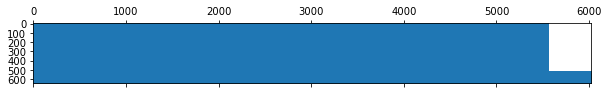

In [19]:
fig, ax1 = plt.subplots(figsize=(10,10))
plt.spy(combined_data_whole_seqs, markersize=1)

# C domains

In [18]:
combined_data_c = pd.concat([scaled_class_1_c1_data, scaled_class_2_c1_data, scaled_class_2_c2_data], join="outer")


combined_data_c.fillna(0, inplace=True)
combined_data_c


,TFE,FER,ERE,REV,EVN,VNS,NSD,SDL,DLY,LYG,...,TLY,ESH,LRL,CHK,HKE,SQS,ELC,LCP,CPG,QFD
P06168_class_1_c1_domain_class_2,6.778941,13.093931,8.516053,12.967398,16.089305,13.154618,9.210472,5.973551,11.725622,13.154618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
P38674_class_1_c1_domain_class_2,6.778941,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,5.973551,5.788804,13.154618,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q64BR7_class_1_c1_domain_class_2,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q57179_class_1_c1_domain_class_2,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Q8FPX1_class_1_c1_domain_class_2,6.875121,-0.075663,-0.116023,-0.075653,-0.061720,-0.075663,-0.107313,-0.165192,-0.148014,-0.075663,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9AQ99_class_2_c2_domain_class_2,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQA0_class_2_c2_domain_class_2,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ96_class_2_c2_domain_class_2,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057
Q9AQ97_class_2_c2_domain_class_2,0.000000,0.000000,0.000000,-0.092057,-0.285956,-0.186400,0.000000,-0.186501,0.000000,0.000000,...,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057,-0.092057


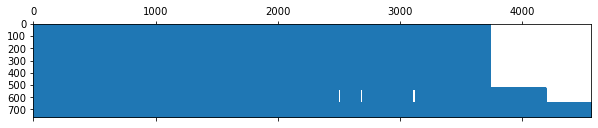

In [19]:
fig, ax1 = plt.subplots(figsize=(10,10))
plt.spy(combined_data_c, markersize=1)

### PCA visualisation

### Whole sequences

In [20]:
labels = [x.split("_", 1)[1] for x in combined_data_whole_seqs.index]

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

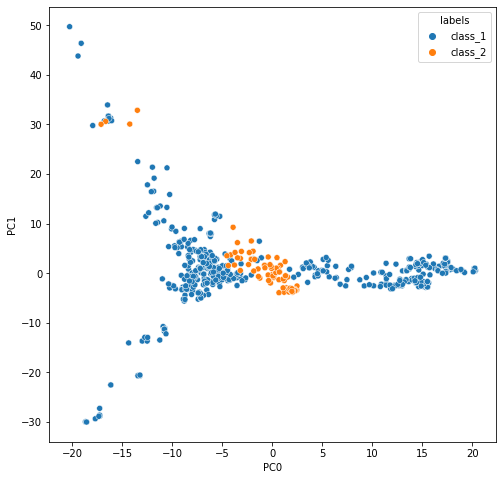

In [21]:
pca = PCA(n_components=10)
pc_data = pca.fit_transform(combined_data_whole_seqs)

principle_df = pd.DataFrame(data = pc_data, columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9'])
principle_df['labels'] = labels

plt.figure(figsize=(8,8))
sns.scatterplot(data = principle_df , x = 'PC0',y = 'PC1', hue='labels')


Text(0.5, 0, 'Component')

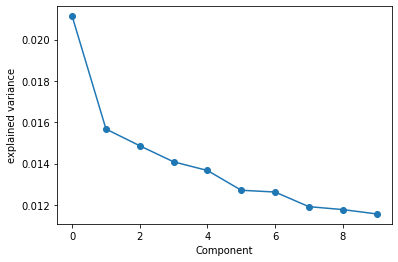

In [22]:
variance = [x for x in pca.explained_variance_ratio_]
components = [x for x in range(10)]

plt.plot(components, variance, '-o')
plt.ylabel("explained variance")
plt.xlabel("Component")

## C domains

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

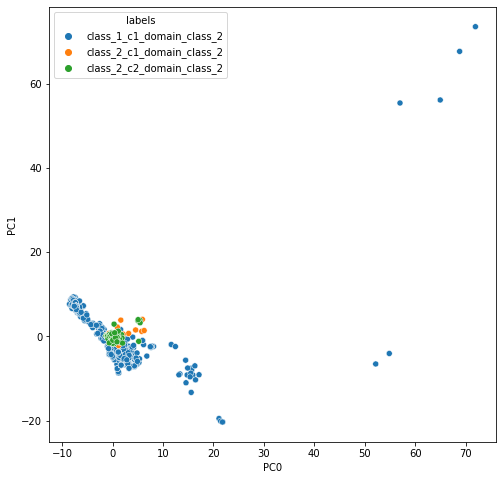

In [23]:
labels = [x.split("_", 1)[1] for x in combined_data_c.index]

pca = PCA(n_components=10)
pc_data = pca.fit_transform(combined_data_c)

principle_df = pd.DataFrame(data = pc_data, columns = ['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9'])
principle_df['labels'] = labels

plt.figure(figsize=(8,8))
sns.scatterplot(data = principle_df , x = 'PC0',y = 'PC1', hue='labels')

Text(0.5, 0, 'Component')

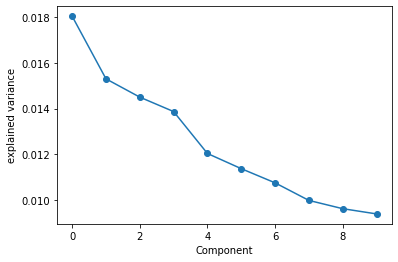

In [24]:
variance = [x for x in pca.explained_variance_ratio_]
components = [x for x in range(10)]

plt.plot(components, variance, '-o')
plt.ylabel("explained variance")
plt.xlabel("Component")

### Clustering 

In [131]:
distmat = np.zeros((combined_data.shape[0], combined_data.shape[0]))
distmat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
filtered_data = combined_data.loc[:, combined_data.columns != 'labels']

import time 

start_time = time.time()
for i in range(combined_data.shape[0]):
    for j in range(i+1, combined_data.shape[0]):
        data = filtered_data.iloc[i].subtract(filtered_data.iloc[j])
        data = np.sqrt(sum(data**2))
        distmat[i,j] = distmat[j,i] = data
        
print(time.time() - start_time)

136.61140704154968


In [133]:
euc_dist = pd.DataFrame(distmat,index=combined_data.index, columns=combined_data.index)


In [134]:
euc_dist

,P06168_class_1,E0SRA9_class_1,A4YI15_class_1,Q9RU74_class_1,A5FR44_class_1,C1CWT7_class_1,Q1J0T2_class_1,Q3ZXI2_class_1,Q3Z891_class_1,A9WC26_class_1,...,B5FCV4_class_2,B7VGL9_class_2,Q5E1S3_class_2,B6EP33_class_2,Q8E9D5_class_2,A3N3E9_class_2,B0BTD3_class_2,B8F6G2_class_2,Q65WK8_class_2,Q9AQA0_class_2
P06168_class_1,0.000000,201.266774,199.197469,188.007243,180.993875,183.999882,194.256899,180.674911,181.159115,183.182217,...,169.628772,172.904014,169.815318,172.589419,180.280352,169.553079,169.553079,169.839963,171.006695,184.527177
E0SRA9_class_1,201.266774,0.000000,164.457950,156.150554,148.033138,151.522052,163.150251,147.642983,147.621573,152.065047,...,134.842070,139.053228,134.827248,139.336956,147.643840,134.772374,134.772374,136.162356,136.891127,152.509590
A4YI15_class_1,199.197469,164.457950,0.000000,150.816295,142.069405,146.290310,158.973024,141.662826,141.735363,144.858230,...,129.128595,133.463516,129.314412,134.136232,142.096632,128.529410,128.529410,128.903095,130.357052,146.725503
Q9RU74_class_1,188.007243,156.150554,150.816295,0.000000,123.380232,98.293568,123.260892,122.803793,123.000105,126.593143,...,106.475760,112.723408,106.772701,112.430738,122.167618,107.220996,107.220996,107.594887,109.761239,128.142176
A5FR44_class_1,180.993875,148.033138,142.069405,123.380232,0.000000,117.285710,133.479163,14.472407,19.313894,116.105862,...,94.650004,101.489108,94.983922,101.562251,111.134621,94.562925,94.562925,94.225302,96.869020,117.799210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A3N3E9_class_2,169.553079,134.772374,128.529410,107.220996,94.562925,100.399138,118.438657,93.950831,94.204322,98.893299,...,72.577061,80.353394,73.027884,80.922699,93.420695,0.000000,0.000000,34.044012,54.527014,103.066782
B0BTD3_class_2,169.553079,134.772374,128.529410,107.220996,94.562925,100.399138,118.438657,93.950831,94.204322,98.893299,...,72.577061,80.353394,73.027884,80.922699,93.420695,0.000000,0.000000,34.044012,54.527014,103.066782
B8F6G2_class_2,169.839963,136.162356,128.903095,107.594887,94.225302,101.175104,119.246619,93.987977,93.914260,98.849650,...,73.305436,81.082670,73.751807,81.687051,93.329168,34.044012,34.044012,0.000000,57.641982,104.003779
Q65WK8_class_2,171.006695,136.891127,130.357052,109.761239,96.869020,103.316372,120.312111,96.271589,96.503709,101.775700,...,75.777132,83.821374,76.268046,83.867239,95.784692,54.527014,54.527014,57.641982,0.000000,105.991886


/home/seb-porras/miniconda3/envs/server/lib/python3.6/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/seb-porras/miniconda3/envs/server/lib/python3.6/site-packages/seaborn/matrix.py:625: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


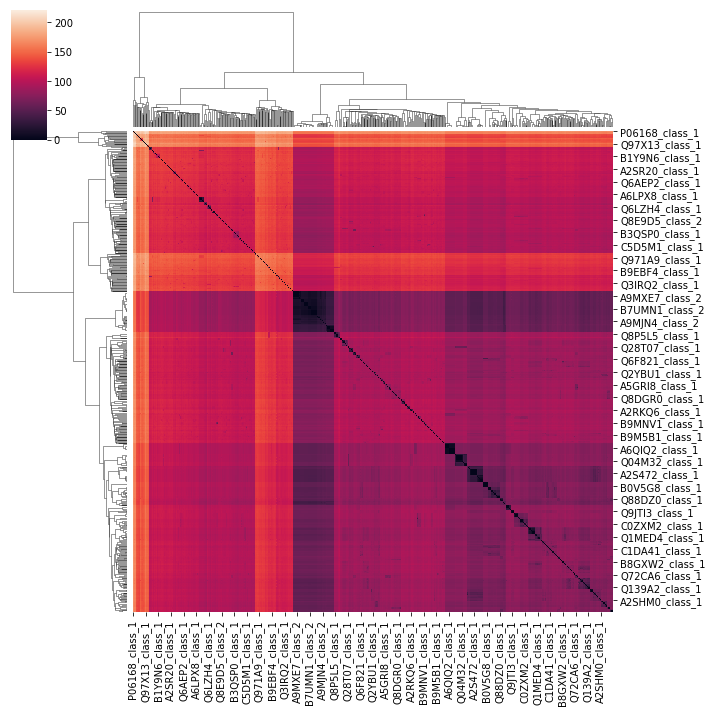

In [135]:
sns.clustermap(euc_dist)

### UMAP Visualisation 